In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

Load the Dataset

In [2]:
paths=[]
labels=[]
dir=r'D:\projects\TESS Toronto emotional speech set data'
for dirname,_,filenames in os.walk(dir):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]#OAF_back_angry.wav
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
#paths[:10]
#labels[:10]
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,D:\projects\TESS Toronto emotional speech set ...,angry
1,D:\projects\TESS Toronto emotional speech set ...,angry
2,D:\projects\TESS Toronto emotional speech set ...,angry
3,D:\projects\TESS Toronto emotional speech set ...,angry
4,D:\projects\TESS Toronto emotional speech set ...,angry


In [4]:
df['speech'].value_counts()

D:\projects\TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav                                               1
D:\projects\TESS Toronto emotional speech set data\TESS Toronto emotional speech set data\YAF_neutral\YAF_rain_neutral.wav    1
D:\projects\TESS Toronto emotional speech set data\TESS Toronto emotional speech set data\YAF_neutral\YAF_road_neutral.wav    1
D:\projects\TESS Toronto emotional speech set data\TESS Toronto emotional speech set data\YAF_neutral\YAF_ripe_neutral.wav    1
D:\projects\TESS Toronto emotional speech set data\TESS Toronto emotional speech set data\YAF_neutral\YAF_ring_neutral.wav    1
                                                                                                                             ..
D:\projects\TESS Toronto emotional speech set data\TESS Toronto emotional speech set data\OAF_Fear\OAF_hush_fear.wav          1
D:\projects\TESS Toronto emotional speech set data\TESS Toronto emotional speech set data\OAF_Fear\OAF_h

In [5]:
df['label'].value_counts()


angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: label, dtype: int64

Exploratory Data Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

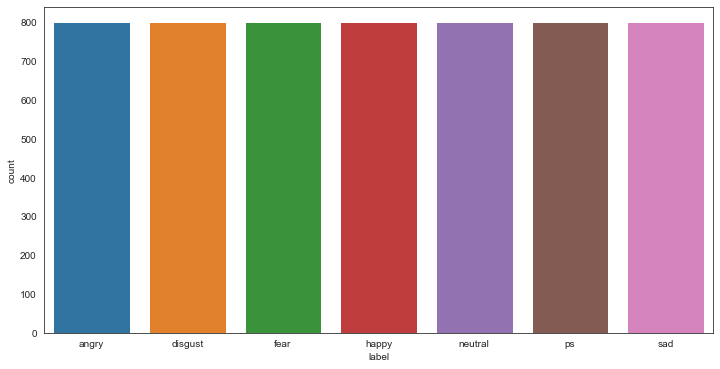

In [6]:
sns.set_style('white')
plt.figure(figsize =(12, 6))
sns.set_context( font_scale = 1)
sns.countplot(x=df['label'])

In [7]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(13,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

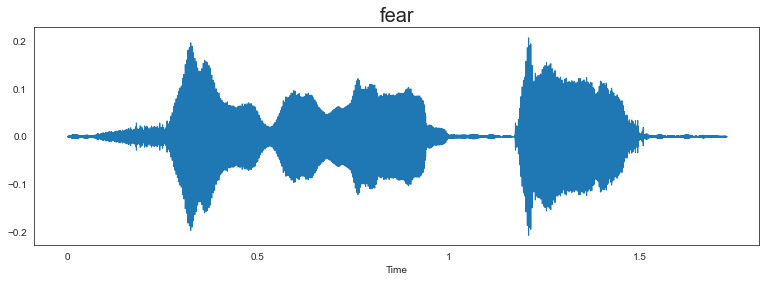

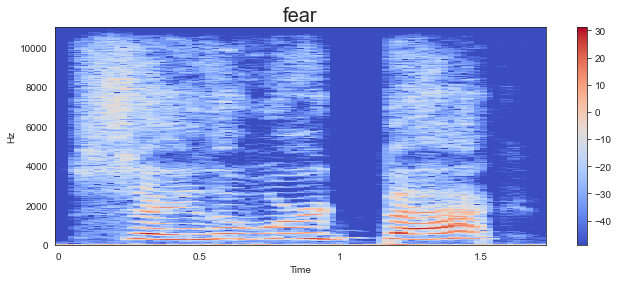

In [8]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

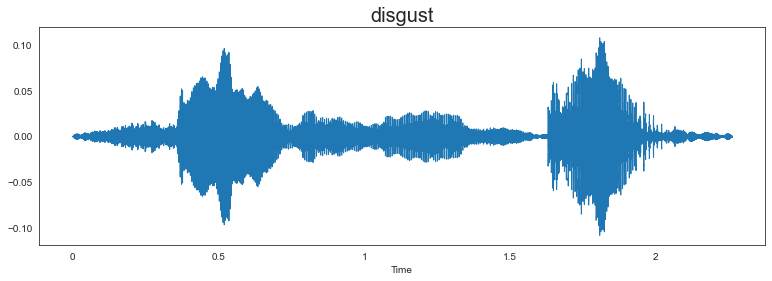

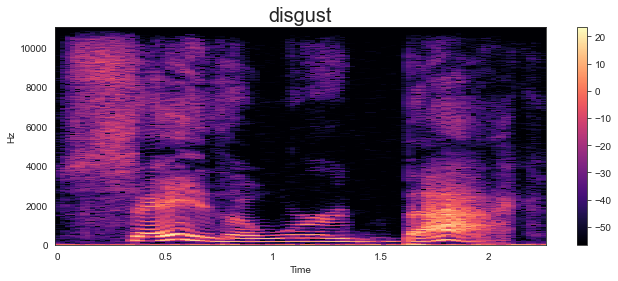

In [9]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

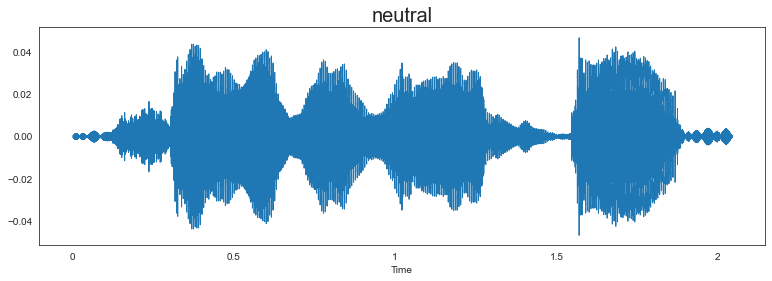

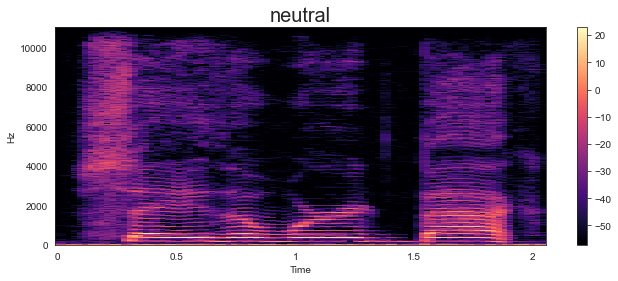

In [10]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

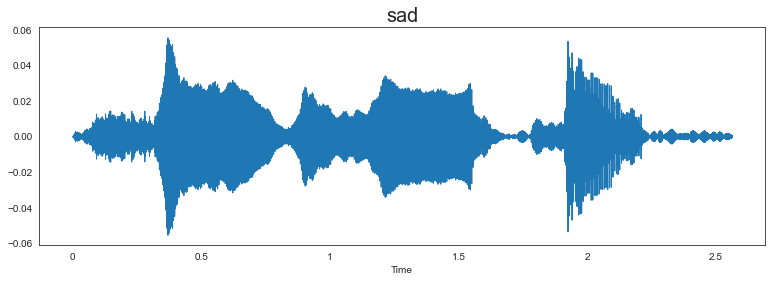

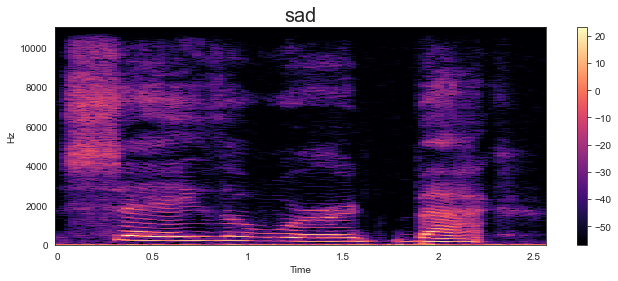

In [11]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

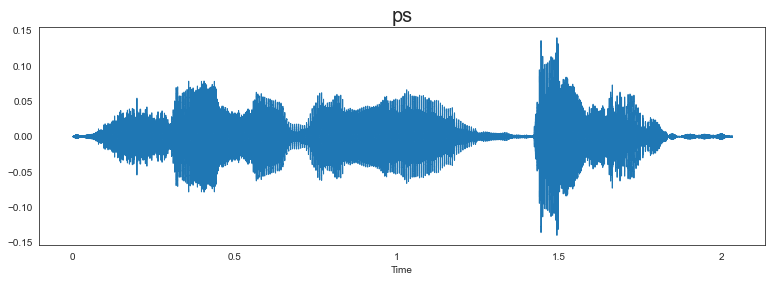

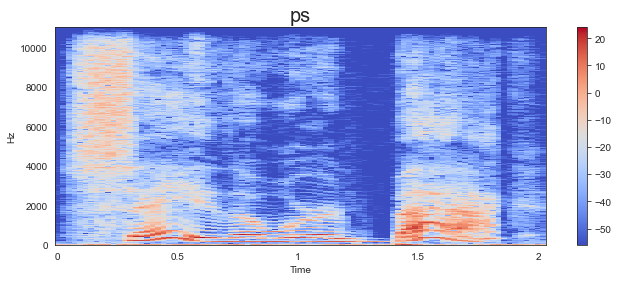

In [12]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


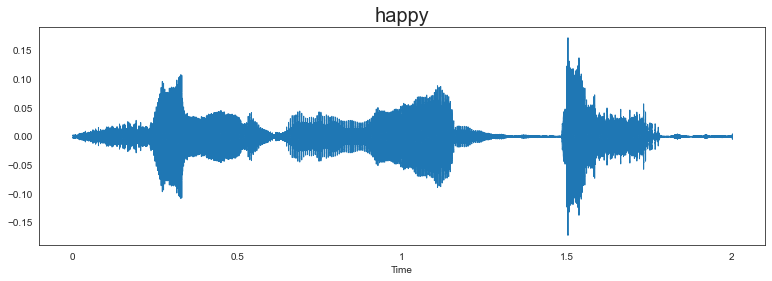

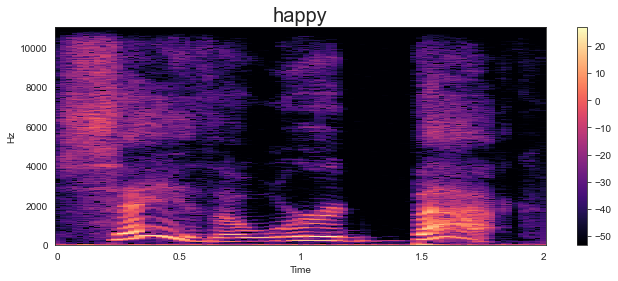

In [13]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [14]:
# import required module
from playsound import playsound
  
# for playing note.wav file
playsound(path)
print('playing sound using  playsound')

playing sound using  playsound


Features Extraction

In [15]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc
extract_mfcc(df['speech'][0])

array([-3.97214874e+02,  7.77846832e+01, -1.99478245e+01, -2.13016663e+01,
       -2.47878647e+00,  1.04415865e+01, -2.07168369e+01, -5.74857569e+00,
       -7.55554676e+00, -2.10370451e-01, -2.18025589e+00,  5.51623225e-01,
        3.94573897e-01,  1.64459980e+00,  2.57582307e+00,  3.15656710e+00,
       -5.01067924e+00, -4.14153624e+00, -1.90491128e+00, -9.96853924e+00,
       -7.81200552e+00, -1.55172932e+00, -7.26189518e+00,  9.65194511e+00,
        8.14204407e+00,  2.19211063e+01,  1.90227432e+01,  2.05200424e+01,
        1.32593021e+01,  8.48793125e+00,  2.54911602e-01,  5.23840904e+00,
        9.45089054e+00,  5.56163883e+00,  2.41641927e+00, -1.74867523e+00,
        4.80002546e+00,  9.37272930e+00,  2.04265857e+00, -1.87645090e+00],
      dtype=float32)

In [17]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))


In [19]:
print(X_mfcc)

0       [-397.21487, 77.78468, -19.947824, -21.301666,...
1       [-465.9048, 99.04303, 0.38121277, -32.46538, -...
2       [-430.20264, 46.719677, 0.9373469, 0.4090696, ...
3       [-403.8607, 76.91445, -13.129478, -21.681879, ...
4       [-434.32446, 77.93651, 10.30538, 16.62942, 7.5...
                              ...                        
5595    [-406.84067, 80.915, 31.92094, 47.126034, -2.2...
5596    [-427.2774, 103.10099, 24.231125, 43.610836, 4...
5597    [-378.90057, 81.49411, 34.707623, 40.347103, -...
5598    [-435.18726, 90.38732, 27.89193, 40.06028, -2....
5599    [-422.2736, 71.34581, 31.815186, 46.311543, 4....
Name: speech, Length: 5600, dtype: object


In [20]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [21]:
## input split
X = np.expand_dims(X, -1)
X.shape



(5600, 40, 1)

In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()
print(y.shape)

(5600, 7)


Create the LSTM Model

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [24]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
70/70 [==============================] - 13s 36ms/step - loss: 0.8824 - accuracy: 0.6522 - val_loss: 0.4129 - val_accuracy: 0.8607
Epoch 2/50
70/70 [==============================] - 2s 22ms/step - loss: 0.2557 - accuracy: 0.9152 - val_loss: 0.0651 - val_accuracy: 0.9777
Epoch 3/50
70/70 [==============================] - 1s 21ms/step - loss: 0.1395 - accuracy: 0.9571 - val_loss: 0.0831 - val_accuracy: 0.9696
Epoch 4/50
70/70 [==============================] - 2s 22ms/step - loss: 0.1137 - accuracy: 0.9645 - val_loss: 0.1118 - val_accuracy: 0.9580
Epoch 5/50
70/70 [==============================] - 2s 22ms/step - loss: 0.1605 - accuracy: 0.9496 - val_loss: 0.0986 - val_accuracy: 0.9688
Epoch 6/50
70/70 [==============================] - 1s 21ms/step - loss: 0.0785 - accuracy: 0.9754 - val_loss: 0.0381 - val_accuracy: 0.9857
Epoch 7/50
70/70 [==============================] - 2s 22ms/step - loss: 0.0573 - accuracy: 0.9817 - val_loss: 0.0142 - val_accuracy: 0.9955
Epoch 8/50
7

Plot the results

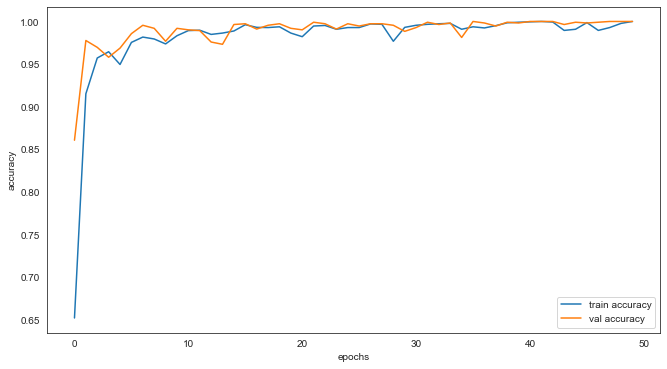

In [30]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(11,6))
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [31]:
model.save("Speech_emotion_recognition.h5")

In [1]:
from tensorflow.keras.models import load_model
import librosa
import librosa.display
import numpy as np
from playsound import playsound
import matplotlib.pyplot as plt
model=load_model(r"D:\projects\Speech_emotion_recognition.h5")

def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc


In [2]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(13,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

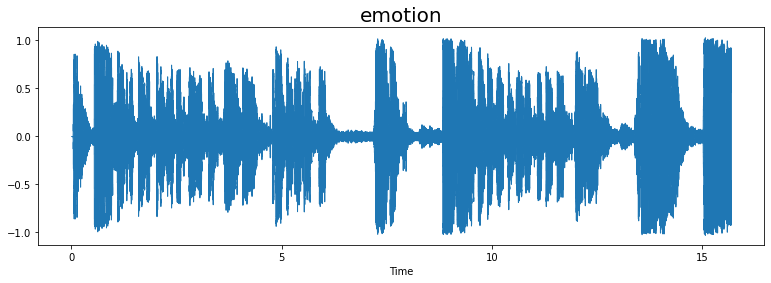

[[0.68718714 0.12018716 0.00423168 0.02354732 0.00437184 0.09682295
  0.06365189]]
Angry


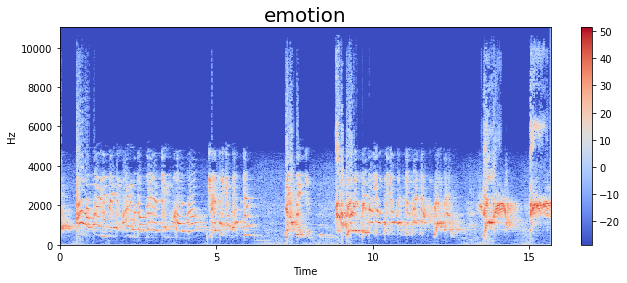

In [3]:
emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral','Ps', 'Sad']
#filename="D:\projects\TESS Toronto emotional speech set data\YAF_sad\YAF_back_sad.wav"
path=r"D:\projects\Angry Woman Voice Notification (online-audio-converter.com).wav"
#path=r"C:\Users\ayada\OneDrive\Documents\Sound recordings\Recording.m4a"
playsound(path)
#print('playing sound using  playsound')


data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, "emotion")
spectogram(data, sampling_rate, "emotion")
#Audio(path)


prediction_feature=extract_mfcc(path)
prediction_feature=prediction_feature.reshape(1,-1)
score=model.predict(prediction_feature)
print(score)
label=emotion_labels[score.argmax()]
print(label)

Speak now


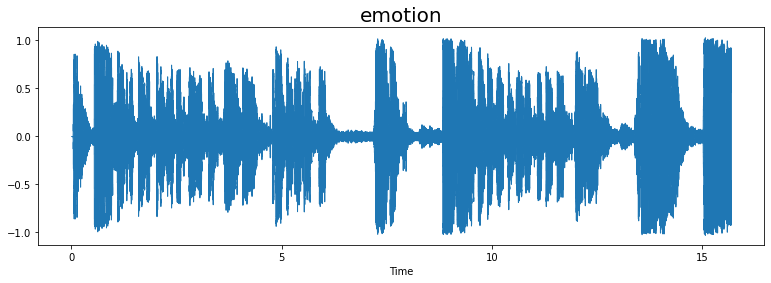

[[0.68718714 0.12018716 0.00423168 0.02354732 0.00437184 0.09682295
  0.06365189]]
Angry
Speak now


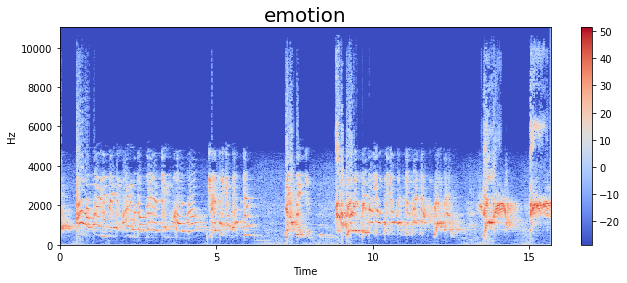

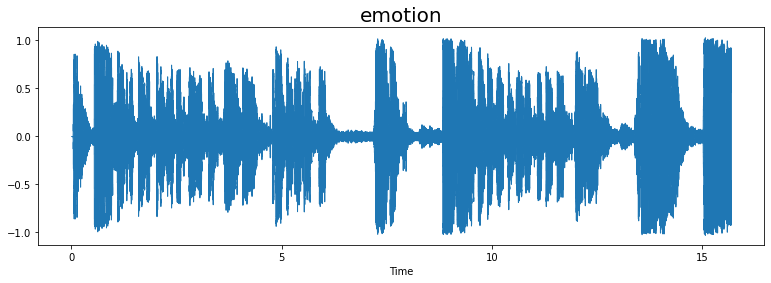

[[0.68718714 0.12018716 0.00423168 0.02354732 0.00437184 0.09682295
  0.06365189]]
Angry
Speak now


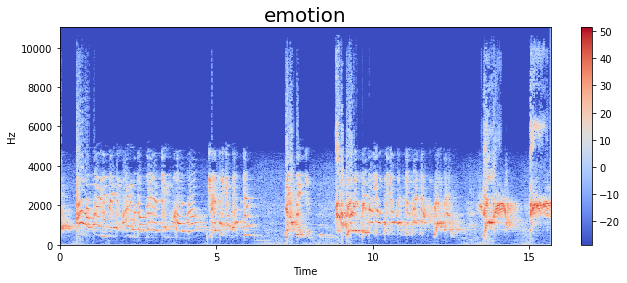

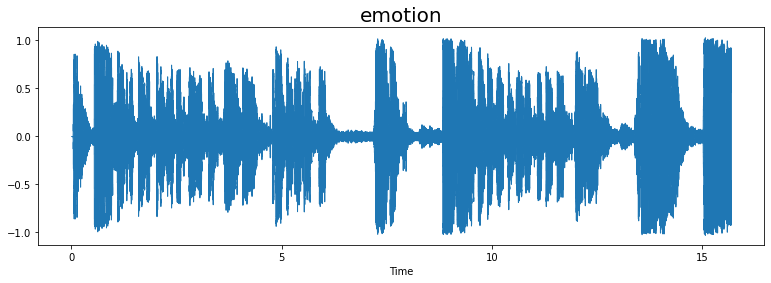

[[0.68718714 0.12018716 0.00423168 0.02354732 0.00437184 0.09682295
  0.06365189]]
Angry
Speak now


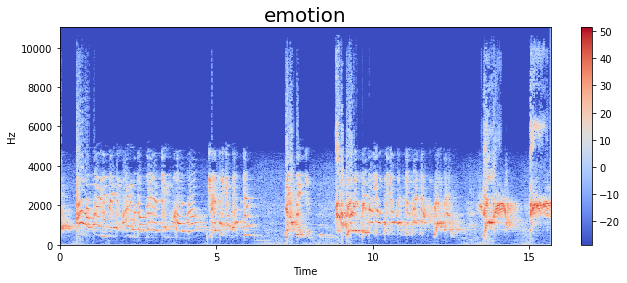

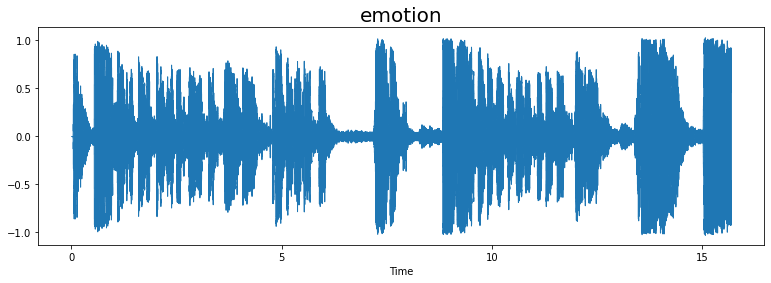

[[0.68718714 0.12018716 0.00423168 0.02354732 0.00437184 0.09682295
  0.06365189]]
Angry
Speak now


KeyboardInterrupt: 

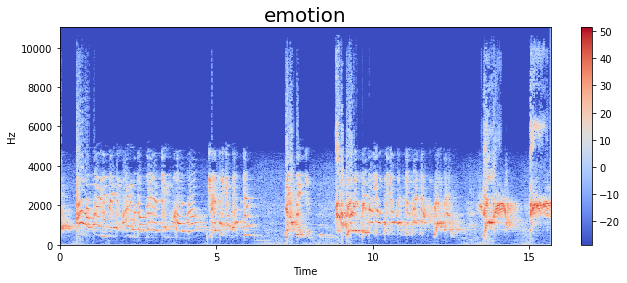

In [6]:
import speech_recognition as sr
r = sr.Recognizer()

while True:
    with sr.Microphone() as source:
        # clear background noise
        r.adjust_for_ambient_noise(source, duration=0.3)
        
        print("Speak now")
        
        # capture the audio
        audio = r.listen(source)
        #r.pause_threshold=0.3
        try:
            data, sampling_rate = librosa.load(path)
            waveplot(data, sampling_rate, "emotion")
            spectogram(data, sampling_rate, "emotion")

            prediction_feature=extract_mfcc(path)
            prediction_feature=prediction_feature.reshape(1,-1)
            score=model.predict(prediction_feature)
            print(score)
            label=emotion_labels[score.argmax()]
            print(label)
            if audio == 'quit':
                break
        except:
            print('Please say again!!!')




prediction_feature=extract_mfcc(path)
prediction_feature=prediction_feature.reshape(1,-1)
score=model.predict(prediction_feature)
print(score)
label=emotion_labels[score.argmax()]
print(label)